In [1]:
import pandas as pd
import rdkit
import numpy as np
from rdkit.Chem import Draw
from rdkit.Chem.Draw import DrawingOptions
DrawingOptions.atomLabelFontSize = 55
DrawingOptions.dotsPerAngstrom = 100
DrawingOptions.bondLineWidth = 3.0

import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})
%matplotlib inline

matplotlib.rcParams['figure.dpi'] = 300

In [2]:
df = pd.read_csv('feat_vectors_2d+Att.csv')
df

,xt_1_x,xt_1_y,xt_3_x,xt_3_y,xt_5_x,xt_5_y,smiles,atom_index,Att_1,Att_2,Att_3,Att_4,Att_5,smarts,atom_type
0,28.626493,13.243486,19.929870,7.716646,-19.076670,9.523425,C,0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,Csp3
1,-31.622374,23.940517,34.802425,27.368294,22.793825,-31.738228,C#C,0,1.000000,1.000000,1.000000,1.000000,1.000000,[#6]#[#6],Csp
2,-31.628900,23.942568,34.799550,27.370565,22.794052,-31.738424,C#C,1,1.000000,1.000000,1.000000,1.000000,1.000000,[#6]#[#6],Csp
3,11.503414,-27.940160,-31.882254,-38.067300,12.656645,-35.456630,C#CC,0,1.000000,0.566662,0.656355,0.731325,0.667630,[#6]#[#6],Csp
4,20.240433,41.023712,-31.855750,-38.111446,12.686236,-35.453320,C#CC,1,0.988365,1.000000,1.000000,1.000000,1.000000,[#6]#[#6]-[#6],Csp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94195,-5.358322,14.999296,17.558798,-46.161858,-18.602760,-8.643709,c1coc(Cc2ccco2)c1,6,0.737100,0.488386,0.725934,0.552399,0.612923,[#6]:[#6]:[#6],C(aro)
94196,19.364540,5.459687,-53.286827,-34.373680,-1.450327,-21.017736,c1coc(Cc2ccco2)c1,7,0.803617,0.589567,0.843895,1.000000,1.000000,[#6]:[#6]:[#6],C(aro)
94197,-31.601885,36.391150,43.000240,-16.024607,10.390285,-31.365892,c1coc(Cc2ccco2)c1,8,0.811213,0.791817,0.850628,0.769385,0.969127,[#6]:[#6]:[#8],C(aro)
94198,27.911581,-38.484800,-4.359104,-29.839330,-32.145020,-15.695665,c1coc(Cc2ccco2)c1,9,0.836912,0.621613,0.782094,0.819543,0.719566,[#6]:[#8]:[#6],O(aro)


In [3]:
xt_1_x, xt_1_y = list(df['xt_1_x']), list(df['xt_1_y'])
xt_3_x, xt_3_y = list(df['xt_3_x']), list(df['xt_3_y'])
xt_5_x, xt_5_y = list(df['xt_5_x']), list(df['xt_5_y'])
atom_types = list(df.atom_type)

In [4]:
index_1 = list(df[df.smiles == 'CCCCOCCCC'].index)
index_2 = list(df[df.smiles == 'CCCCOC(C)CC'].index)

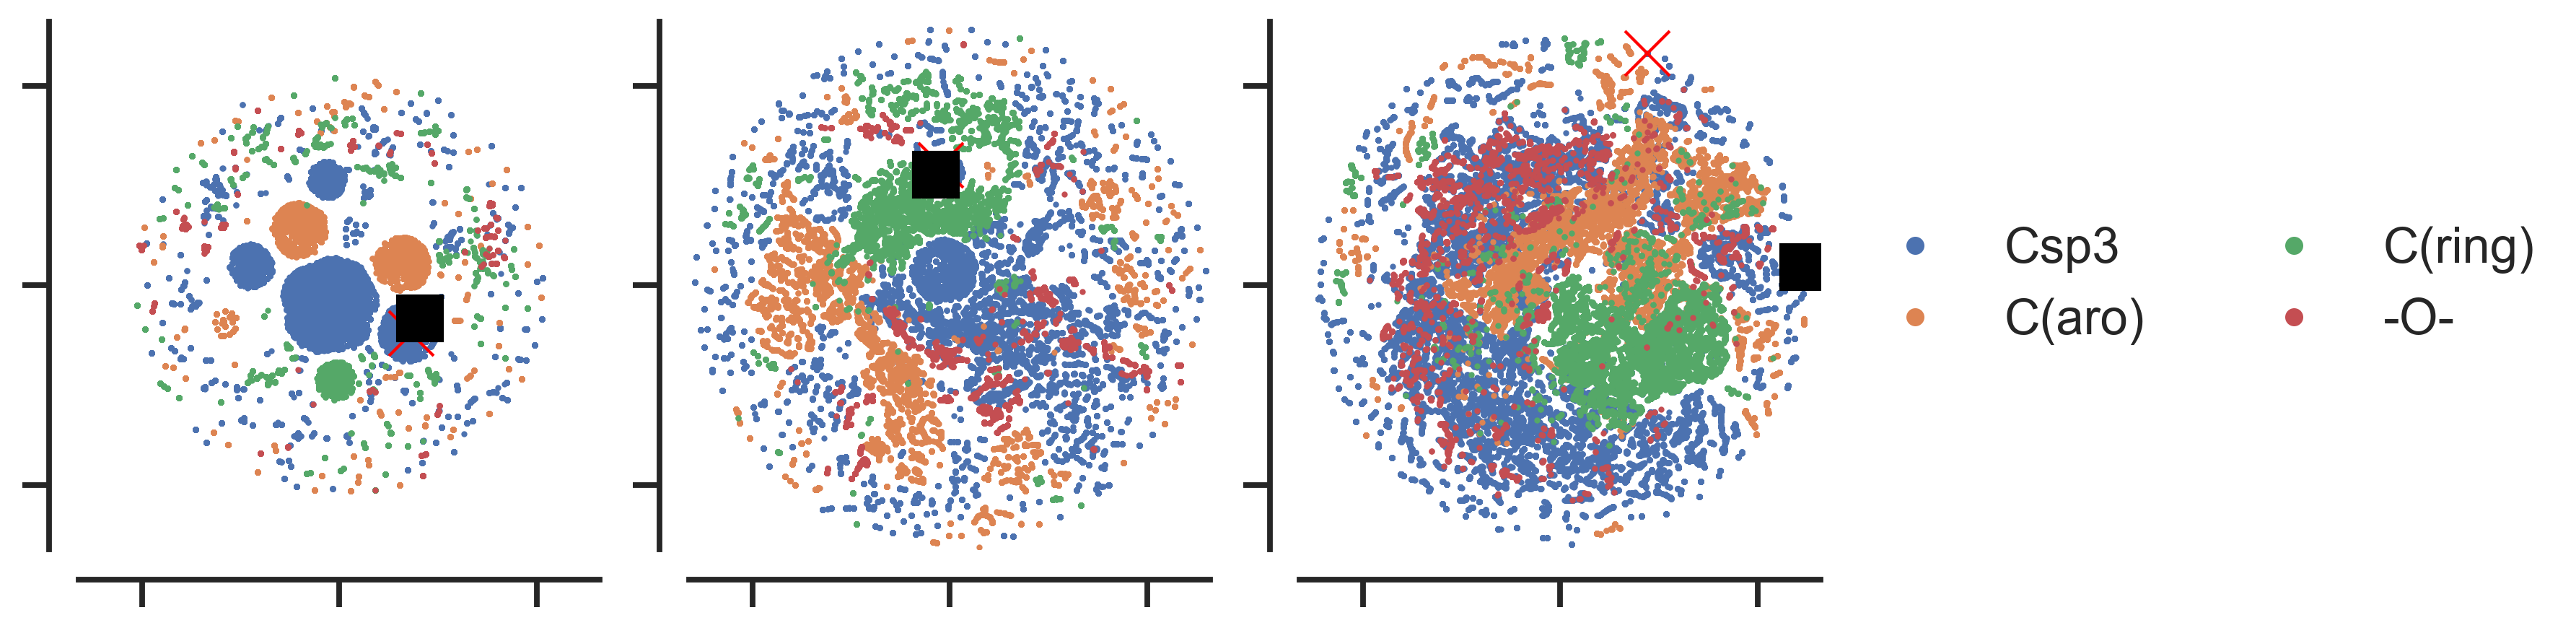

In [5]:
fig, axmatrix = plt.subplots(ncols=3, figsize=(12,3), sharex=True, sharey=True)

types_to_plot = [ 'Csp3', 'C(aro)', 'C(ring)', '-O-']
#types_to_plot = ['Csp',  'Csp2', 'O(aro)', 'O(ring)',  'O=']


for atom_type in types_to_plot:
    atom_indices_to_plot = [i for i, at in enumerate(atom_types) if at == atom_type]
    
    xt_1_x_plt, xt_1_y_plt = [xt_1_x[i] for i in atom_indices_to_plot],\
                             [xt_1_y[i] for i in atom_indices_to_plot]

    xt_3_x_plt, xt_3_y_plt = [xt_3_x[i] for i in atom_indices_to_plot],\
                             [xt_3_y[i] for i in atom_indices_to_plot]

    xt_5_x_plt, xt_5_y_plt = [xt_5_x[i] for i in atom_indices_to_plot],\
                             [xt_5_y[i] for i in atom_indices_to_plot]
    
    axmatrix[0].plot(xt_1_x_plt, xt_1_y_plt,\
                      '.', ms=2, zorder=-1)
    
    axmatrix[1].plot(xt_3_x_plt, xt_3_y_plt,\
                      '.', ms=2, zorder=-1)
    
    axmatrix[2].plot(xt_5_x_plt, xt_5_y_plt,\
                      '.', ms=2, label = atom_type, zorder=-1)
#specific molecule
axmatrix[0].plot([xt_1_x[index_1[0]]], [xt_1_y[index_1[0]]],\
                  'x', ms=15, zorder=-1, color='red')
axmatrix[1].plot([xt_3_x[index_1[0]]], [xt_3_y[index_1[0]]],\
                  'x', ms=15, zorder=-1, color='red')
axmatrix[2].plot([xt_5_x[index_1[0]]], [xt_5_y[index_1[0]]],\
                  'x', ms=15, zorder=-1, color='red')

axmatrix[0].plot([xt_1_x[index_2[0]]], [xt_1_y[index_2[0]]],\
                  's', ms=15, zorder=-1, color='black')
axmatrix[1].plot([xt_3_x[index_2[0]]], [xt_3_y[index_2[0]]],\
                  's', ms=15, zorder=-1, color='black')
axmatrix[2].plot([xt_5_x[index_2[0]]], [xt_5_y[index_2[0]]],\
                  's', ms=15, zorder=-1, color='black')


    
sns.despine(offset=10)
for i in range(3):
    axmatrix[i].set_xlim([-66, 66])
    axmatrix[i].set_ylim([-66, 66])
    axmatrix[i].set_rasterization_zorder(0)

for ax in axmatrix:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
leg = axmatrix[2].legend(loc='center left', bbox_to_anchor=(1., 0.5), markerscale=5, ncol=2)
plt.tight_layout()

# ----------------------------

In [6]:
df2 = pd.read_csv('results_/best_211007/functional_groups.csv')
df2

,smiles,functional_group
0,C#CC(=O)OC,Ester
1,C#CC(=O)OCC,Ester
2,C#CC(=O)Oc1ccc(C(C)(C)c2ccc(OC(=O)C#C)cc2)cc1,Ester
3,C#CC(=O)Oc1ccc(OC(=O)C#C)cc1,Ester
4,C#CC(=O)Oc1ccc(Oc2ccc(OC(=O)C#C)cc2)cc1,Ester
...,...,...
7395,c1ccc2cc3c(ccc4ccccc43)cc2c1,FusedRings
7396,c1ccc2cccc-2cc1,FusedRings
7397,c1ccc2ccccc2c1,FusedRings
7398,c1ccccc#1,Cyclics


In [7]:
for _, row in df2.iterrows():
    df.loc[(df.smiles == row['smiles']), 'functional_group'] = row['functional_group']

In [8]:
# https://gist.github.com/iwatobipen/72a2d9dd616322f1f20469a152f2bb58

import copy
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from IPython.display import display, Image
import matplotlib
import matplotlib.cm as cm
from rdkit import Chem


def drawmol(smiles, atom_attention_scores):
    # need to replace atom_weights, bg.number_of_nodes
    
    #print(min(atom_attention_scores), max(atom_attention_scores))
    
    norm = matplotlib.colors.Normalize(vmin=0.25, vmax=1.0)
    cmap = cm.get_cmap('BuPu')
    plt_colors = cm.ScalarMappable(norm=norm, cmap=cmap)
    atom_colors = {i: plt_colors.to_rgba(atom_attention_scores[i]) for i in range(len(atom_attention_scores))}

    mol = Chem.MolFromSmiles(smiles)
    
    #for a_ind, atom in enumerate(mol.GetAtoms()):
    #    atom.SetProp('atomNote', '%.2f' % atom_attention_scores[a_ind])
    
    #print((len(mol.GetBonds()) * 2 + len(mol.GetAtoms())) / len(mol.GetAtoms()))
    
    rdDepictor.Compute2DCoords(mol)
    drawer = rdMolDraw2D.MolDraw2DSVG(600, 600)
    

    drawer.SetFontSize(30)
    #op = drawer.drawOptions()
    
    mol = rdMolDraw2D.PrepareMolForDrawing(mol)
    drawer.DrawMolecule(mol, highlightAtoms=range(len(atom_attention_scores)),
                             highlightAtomColors=atom_colors,
                             highlightBonds=None)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    svg = svg.replace('svg:', '')
    return svg

CCCCOCC(C)C 4.551585317468929


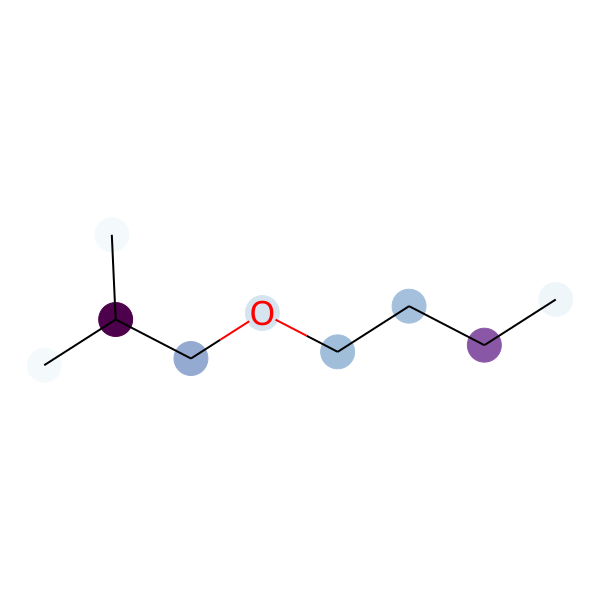

In [10]:
#Fig. 6 - attention weights plot
#smiles_of_interest = ['CCCCOCCCC', 'CCCCOCC(C)C', 'CC(C)COCC(C)C']
#smiles_of_interest = ['COC(=O)C(C)O', 'COC(=O)CCO', 'CCCC(O)CC(=O)OCC', 'CCCCCC(=O)OCC']
#smiles_of_interest = ['COC(=O)CCO']
smiles_of_interest = ['CCCCOCC(C)C']
    
df_interest = df[df.smiles.isin(smiles_of_interest)]
    
for smi, sub_df in df_interest.groupby('smiles'):
    sub_df = sub_df.sort_values(by=['atom_index'], ascending = True)
    at_scores = list(sub_df.Att_5)
    print(smi, sum(at_scores))
    display(SVG(drawmol(smi, at_scores)))